In [1]:
import pandas as pd
import numpy as np


# df has 2 classes diabetic and non diabetic

In [2]:
df=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print(df.shape)
df.head()

(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
columns=df.columns
check=[]
for i in columns:
    unique_cardinal=len(df[i].unique())
    print(i, ':',unique_cardinal)
    if unique_cardinal<=10 and unique_cardinal>2:
        check.append(i)
print('\n Checking for categorical data\n')
for i in check:
    print(i, ':',df[i].unique())

Diabetes_binary : 2
HighBP : 2
HighChol : 2
CholCheck : 2
BMI : 80
Smoker : 2
Stroke : 2
HeartDiseaseorAttack : 2
PhysActivity : 2
Fruits : 2
Veggies : 2
HvyAlcoholConsump : 2
AnyHealthcare : 2
NoDocbcCost : 2
GenHlth : 5
MentHlth : 31
PhysHlth : 31
DiffWalk : 2
Sex : 2
Age : 13
Education : 6
Income : 8

 Checking for categorical data

GenHlth : [3. 1. 2. 4. 5.]
Education : [6. 5. 4. 3. 2. 1.]
Income : [8. 7. 6. 3. 4. 1. 5. 2.]


Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


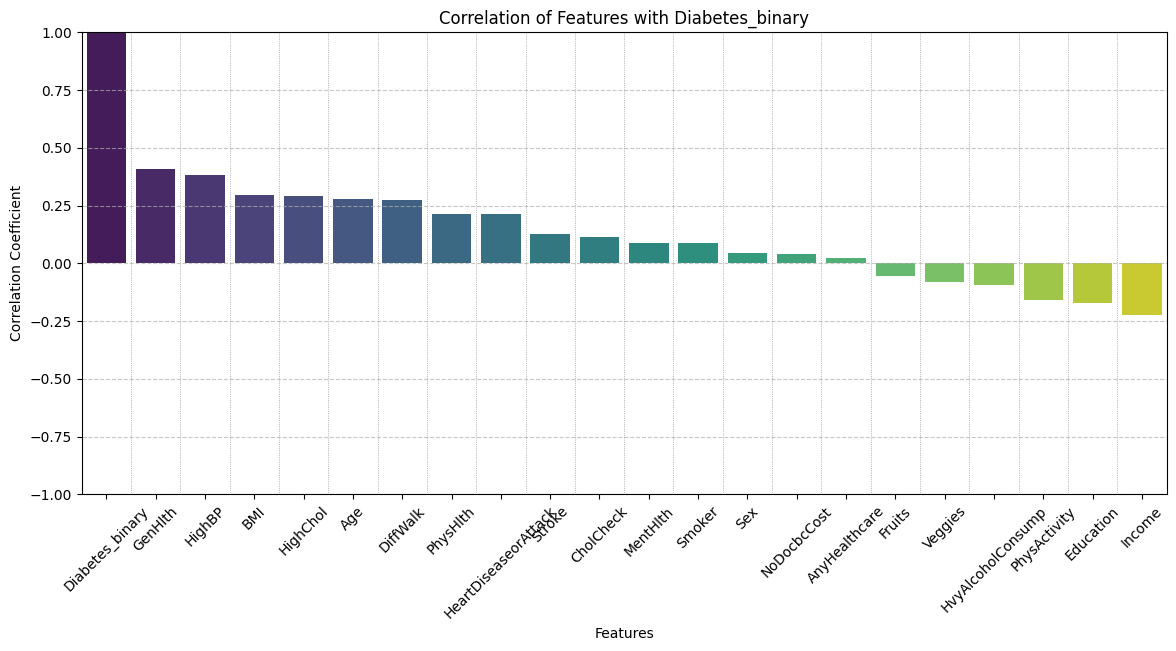

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_target = df.corr()['Diabetes_binary'].sort_values(ascending=False)
print(correlation_with_target)

plt.figure(figsize=(14, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis', hue=correlation_with_target.index, legend=False)

for i in range(len(correlation_with_target)):
    plt.axvline(x=i - 0.5, color='gray', linestyle=':', linewidth=0.5)

plt.title(f'Correlation of Features with Diabetes_binary')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.ylim(-1, 1) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [6]:
Y=df['Diabetes_binary'].copy()
X=df.drop('Diabetes_binary',axis='columns')
print(X.head())
print(Y.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  26.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  26.0     1.0     1.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  28.0     1.0     0.0                   0.0   
4     0.0       0.0        1.0  29.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           1.0     0.0      1.0  ...            1.0          0.0      3.0   
1           0.0     1.0      0.0  ...            1.0          0.0      3.0   
2           1.0     1.0      1.0  ...            1.0          0.0      1.0   
3           1.0     1.0      1.0  ...            1.0          0.0      3.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

# this DF2 data has 3 class prediabetic , diabetic and non diabetic

In [7]:
df2=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
print(df2.shape)
df2.head()

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
df2.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
columns=df2.columns
check=[]
for i in columns:
    unique_cardinal=len(df2[i].unique())
    print(i, ':',unique_cardinal)
    if unique_cardinal<=10 and unique_cardinal>2:
        check.append(i)
print('\n Checking for categorical data\n')
for i in check:
    print(i, ':',df2[i].unique())

Diabetes_012 : 3
HighBP : 2
HighChol : 2
CholCheck : 2
BMI : 84
Smoker : 2
Stroke : 2
HeartDiseaseorAttack : 2
PhysActivity : 2
Fruits : 2
Veggies : 2
HvyAlcoholConsump : 2
AnyHealthcare : 2
NoDocbcCost : 2
GenHlth : 5
MentHlth : 31
PhysHlth : 31
DiffWalk : 2
Sex : 2
Age : 13
Education : 6
Income : 8

 Checking for categorical data

Diabetes_012 : [0. 2. 1.]
GenHlth : [5. 3. 2. 4. 1.]
Education : [4. 6. 3. 5. 2. 1.]
Income : [3. 1. 8. 6. 4. 7. 2. 5.]


Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


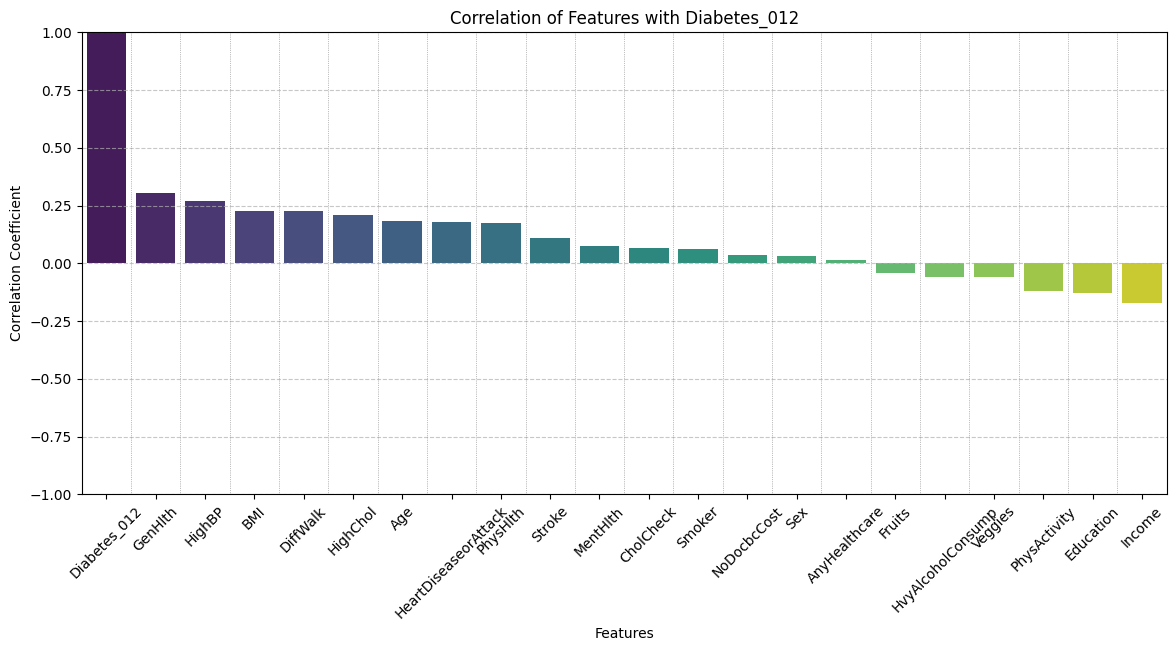

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_target = df2.corr()['Diabetes_012'].sort_values(ascending=False)
print(correlation_with_target)

plt.figure(figsize=(14, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis', hue=correlation_with_target.index, legend=False)

for i in range(len(correlation_with_target)):
    plt.axvline(x=i - 0.5, color='gray', linestyle=':', linewidth=0.5)

plt.title(f'Correlation of Features with Diabetes_012')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.ylim(-1, 1) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [11]:
# print(df['Diabetes_binary'].value_counts())
print(df2['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [12]:
Y1=df2['Diabetes_012'].copy()
X1=df2.drop('Diabetes_012',axis='columns')
print(X1.head())
print(Y1.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

In [13]:
print(Y1.unique())
print(Y.unique())

[0. 2. 1.]
[0. 1.]


# the following code uses df dataset with 2 classes of diabetic and 
# non diabetic to Preprocess such as one-hot encoding for categorical
# features and then train the model

In [14]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [15]:
df_OneHotEncoded = pd.get_dummies(X, columns=['GenHlth', 'Education', 'Income'], drop_first=True)
df_OneHotEncoded = df_OneHotEncoded.astype(float)
print(df_OneHotEncoded.head())


   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  26.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  26.0     1.0     1.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  28.0     1.0     0.0                   0.0   
4     0.0       0.0        1.0  29.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  Education_4.0  Education_5.0  \
0           1.0     0.0      1.0  ...            0.0            0.0   
1           0.0     1.0      0.0  ...            0.0            0.0   
2           1.0     1.0      1.0  ...            0.0            0.0   
3           1.0     1.0      1.0  ...            0.0            0.0   
4           1.0     1.0      1.0  ...            0.0            1.0   

   Education_6.0  Income_2.0  Income_3.0  Income_4.0  Income_5.0  Income_6.0  \
0            1.0        

In [16]:
df_OneHotEncoded.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'GenHlth_2.0', 'GenHlth_3.0',
       'GenHlth_4.0', 'GenHlth_5.0', 'Education_2.0', 'Education_3.0',
       'Education_4.0', 'Education_5.0', 'Education_6.0', 'Income_2.0',
       'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0',
       'Income_8.0'],
      dtype='object')

#  Training With ONE-HOT ENCODING

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_OneHotEncoded, Y, test_size=0.3, random_state=42)

# Initialize algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Loop over classifiers and fit each one
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} executed successfully with accuracy: {accuracy:.4f}")
    print(classification_report(Y_test, Y_pred, target_names=['Class 1', 'Class 2']))


Logistic Regression executed successfully with accuracy: 0.7501
              precision    recall  f1-score   support

     Class 1       0.76      0.72      0.74     10601
     Class 2       0.74      0.78      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

K-Nearest Neighbors executed successfully with accuracy: 0.7018
              precision    recall  f1-score   support

     Class 1       0.71      0.69      0.70     10601
     Class 2       0.70      0.71      0.70     10607

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.70     21208
weighted avg       0.70      0.70      0.70     21208

Support Vector Machine executed successfully with accuracy: 0.7491
              precision    recall  f1-score   support

     Class 1       0.78      0.70      0.73     10601
     Class 2       0.72      0.80      0.7

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost executed successfully with accuracy: 0.7472
              precision    recall  f1-score   support

     Class 1       0.77      0.71      0.74     10601
     Class 2       0.73      0.78      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

[LightGBM] [Info] Number of positive: 24739, number of negative: 24745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 49484, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499939 -> initscore=-0.000243
[LightGBM] [Info] Start training from score -0.000243
LightGBM executed successfully with accuracy: 0.7542
           

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost executed successfully with accuracy: 0.7506
              precision    recall  f1-score   support

     Class 1       0.76      0.73      0.75     10601
     Class 2       0.74      0.77      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



# Training Without ONE-HOT ENCODING

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Loop over classifiers and fit each one
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} executed successfully with accuracy: {accuracy:.4f}")
    print(classification_report(Y_test, Y_pred, target_names=['Class 1', 'Class 2']))


Logistic Regression executed successfully with accuracy: 0.7491
              precision    recall  f1-score   support

     Class 1       0.76      0.73      0.74     10601
     Class 2       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

K-Nearest Neighbors executed successfully with accuracy: 0.7090
              precision    recall  f1-score   support

     Class 1       0.72      0.68      0.70     10601
     Class 2       0.70      0.74      0.72     10607

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208

Support Vector Machine executed successfully with accuracy: 0.7499
              precision    recall  f1-score   support

     Class 1       0.78      0.69      0.73     10601
     Class 2       0.72      0.81      0.7

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

     Class 1       0.77      0.71      0.74     10601
     Class 2       0.73      0.79      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

[LightGBM] [Info] Number of positive: 24739, number of negative: 24745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 49484, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499939 -> initscore=-0.000243
[LightGBM] [Info] Start training from score -0.000243
LightGBM executed successfully with accuracy: 0.7543
              precision    recall  f1-score   support

     Cla

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost executed successfully with accuracy: 0.7515
              precision    recall  f1-score   support

     Class 1       0.76      0.73      0.75     10601
     Class 2       0.74      0.78      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



# Conclusion

### While one-hot encoding did not significantly impact the accuracy in this case, 
### it is important to note that, in theory, one-hot encoding is the appropriate method for representing categorical data.

# the following code is trying to correct the 
# imbalanced of df2 data set for 3 classes 

In [17]:

df2.head

<bound method NDFrame.head of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcar

In [18]:
df2_OneHotEncoded = pd.get_dummies(X1, columns=['GenHlth', 'Education', 'Income'], drop_first=True)
df2_OneHotEncoded = df2_OneHotEncoded.astype(float)
print(df2_OneHotEncoded.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  Education_4.0  Education_5.0  \
0           0.0     0.0      1.0  ...            1.0            0.0   
1           1.0     0.0      0.0  ...            0.0            0.0   
2           0.0     1.0      0.0  ...            1.0            0.0   
3           1.0     1.0      1.0  ...            0.0            0.0   
4           1.0     1.0      1.0  ...            0.0            1.0   

   Education_6.0  Income_2.0  Income_3.0  Income_4.0  Income_5.0  Income_6.0  \
0            0.0        

In [19]:
Y2_OneHotEncoded= pd.get_dummies(Y1).astype(int)
print(Y2_OneHotEncoded.head())

   0.0  1.0  2.0
0    1    0    0
1    1    0    0
2    1    0    0
3    1    0    0
4    1    0    0


# Training without SMOTE and Without ONE-HOT ENCODING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Initialize algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Loop over classifiers and fit each one
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} executed successfully with accuracy: {accuracy:.4f}")
    print(classification_report(Y_test, Y_pred, target_names=['Class 1', 'Class 2', 'class 3']))


Logistic Regression executed successfully with accuracy: 0.8477
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64180
     Class 2       0.00      0.00      0.00      1425
     class 3       0.53      0.18      0.27     10499

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

K-Nearest Neighbors executed successfully with accuracy: 0.8327
              precision    recall  f1-score   support

     Class 1       0.86      0.96      0.91     64180
     Class 2       0.00      0.00      0.00      1425
     class 3       0.40      0.19      0.26     10499

    accuracy                           0.83     76104
   macro avg       0.42      0.38      0.39     76104
weighted avg       0.78      0.83      0.80     76104

Decision Tree executed successfully with accuracy: 0.7676
              precision    recall  f1-score   support

     Class 1       0.88      0.86      0.87     64180
     Class 2       0.03      0.04      0.04      1425
     class 3       0.29      0.32      0.30     10499

    accuracy                           0.77     76104
   macro avg       0.40      0.41      0.40     76104
weighted avg       0.78      0.77      0.77     76104

Random Forest executed successfully with accuracy: 0.8421
              precision    recall  f1-score   support

   

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

XGBoost executed successfully with accuracy: 0.8491
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64180
     Class 2       0.00      0.00      0.00      1425
     class 3       0.54      0.19      0.28     10499

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 177576, number of used features: 21
[LightGBM] [Info] Start training from score -0.171948
[LightGBM] [Info] Start training from score -4.014375
[LightGBM] [Info] Start training from score -1.966662
LightGBM executed successfully with accuracy: 0.8496
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64180
     Class 2       0.00      0.00      0.00      1425
     class 3       0.55      0.18      0.27     10499

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104

CatBoost executed successfully with accuracy: 0.848

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Quadratic Discriminant Analysis executed successfully with accuracy: 0.7517
              precision    recall  f1-score   support

     Class 1       0.90      0.80      0.85     64180
     Class 2       0.03      0.01      0.02      1425
     class 3       0.31      0.55      0.40     10499

    accuracy                           0.75     76104
   macro avg       0.41      0.46      0.42     76104
weighted avg       0.81      0.75      0.77     76104

Neural Network executed successfully with accuracy: 0.8506
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64180
     Class 2       0.00      0.00      0.00      1425
     class 3       0.57      0.17      0.26     10499

    accuracy                           0.85     76104
   macro avg       0.48      0.38      0.39     76104
weighted avg       0.81      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

AdaBoost executed successfully with accuracy: 0.8490
              precision    recall  f1-score   support

     Class 1       0.87      0.97      0.92     64180
     Class 2       0.00      0.00      0.00      1425
     class 3       0.53      0.21      0.30     10499

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.41     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Training with SMOTE and ONE-HOT ENCODING

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

X_train, X_test, Y_train, Y_test = train_test_split(df2_OneHotEncoded, Y1, test_size=0.3, random_state=42, stratify=Y1)

smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Loop over classifiers and fit each one
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} executed successfully with accuracy: {accuracy:.4f}")
    print(classification_report(Y_test, Y_pred, target_names=['Class 1', 'Class 2','Class 3']))


Logistic Regression executed successfully with accuracy: 0.8465
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64111
     Class 2       0.00      0.00      0.00      1389
     Class 3       0.53      0.17      0.26     10604

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

K-Nearest Neighbors executed successfully with accuracy: 0.8313
              precision    recall  f1-score   support

     Class 1       0.86      0.96      0.91     64111
     Class 2       0.05      0.00      0.00      1389
     Class 3       0.40      0.18      0.25     10604

    accuracy                           0.83     76104
   macro avg       0.44      0.38      0.39     76104
weighted avg       0.78      0.83      0.80     76104

Decision Tree executed successfully with accuracy: 0.7709
              precision    recall  f1-score   support

     Class 1       0.88      0.86      0.87     64111
     Class 2       0.03      0.03      0.03      1389
     Class 3       0.30      0.32      0.31     10604

    accuracy                           0.77     76104
   macro avg       0.40      0.41      0.40     76104
weighted avg       0.78      0.77      0.78     76104

Random Forest executed successfully with accuracy: 0.8417
              precision    recall  f1-score   support

   

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost executed successfully with accuracy: 0.8500
              precision    recall  f1-score   support

     Class 1       0.87      0.98      0.92     64111
     Class 2       0.00      0.00      0.00      1389
     Class 3       0.56      0.20      0.29     10604

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 177576, number of used features: 34
[LightGBM] [Info] Start training from score -0.171487
[LightGBM] [Info] Start training from score -4.003208
[LightGBM] [Info] Start training from score -1.970896
LightGBM executed successfully with accuracy: 0.8497
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64111
     Class 2       0.00      0.00      0.00      1389
     Class 3       0.56      0.18      0.28     10604

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

CatBoost executed successfully with accuracy: 0.8494
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64111
     Class 2       0.00      0.00      0.00      1389
     Class 3       0.55      0.19      0.28     10604

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104

Naive Bayes executed successfully with accuracy: 0.7515
              precision    recall  f1-score   support

     Class 1       0.91      0.80      0.85     64111
     Class 2       0.03      0.03      0.03      1389
     Class 3       0.32      0.55      0.40     10604

    accuracy                           0.75     76104
   macro avg       0.42      0.46      0.43     76104
weighted avg       0.81      0.75      0.77     76104

Linear Discriminant Analysis executed successfully with accuracy: 0.8438
              precision    recall  f1-score   support

 

c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Quadratic Discriminant Analysis executed successfully with accuracy: 0.7443
              precision    recall  f1-score   support

     Class 1       0.91      0.79      0.84     64111
     Class 2       0.04      0.03      0.04      1389
     Class 3       0.31      0.56      0.40     10604

    accuracy                           0.74     76104
   macro avg       0.42      0.46      0.43     76104
weighted avg       0.81      0.74      0.77     76104

Neural Network executed successfully with accuracy: 0.8476
              precision    recall  f1-score   support

     Class 1       0.87      0.97      0.92     64111
     Class 2       0.00      0.00      0.00      1389
     Class 3       0.52      0.24      0.32     10604

    accuracy                           0.85     76104
   macro avg       0.46      0.40      0.41     76104
weighted avg       0.81      0.85      0.82     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost executed successfully with accuracy: 0.8483
              precision    recall  f1-score   support

     Class 1       0.86      0.98      0.92     64111
     Class 2       0.00      0.00      0.00      1389
     Class 3       0.54      0.19      0.28     10604

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104



c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pranj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Assume X1 is your feature matrix and Y1 is your target variable
# Convert to DataFrame if not already
X1 = pd.DataFrame(X1)  # Ensure X1 is a DataFrame for one-hot encoding
Y1 = pd.Series(Y1)      # Ensure Y1 is a Series

# Split the data into features (X) and target (Y)
assert len(X1) == len(Y1), "X1 and Y1 must have the same number of samples"

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42, stratify=Y1)

# Apply SMOTE to the training data to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# One-hot encode the categorical features
X_train_smote = pd.get_dummies(X_train_smote, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of the test set with the training set
X_test = X_test.reindex(columns=X_train_smote.columns, fill_value=0)

# Compute class weights
classes = np.unique(Y_train_smote)
class_weights = compute_class_weight('balanced', classes=classes, y=Y_train_smote)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"Training data shape after SMOTE: {X_train_smote.shape}")
print(f"Training labels shape after SMOTE: {Y_train_smote.shape}")
print(f"Training labels distribution after SMOTE:\n{pd.Series(Y_train_smote).value_counts()}")

# Initialize a RandomForestClassifier with class weights
clf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)

# Train the model
clf.fit(X_train_smote, Y_train_smote)

# Predict on the test set
Y_pred = clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in classes]))

# Prepare to evaluate other classifiers
X_train, X_test, Y_train, Y_test = train_test_split(X_train_smote, Y_train_smote, test_size=0.3, random_state=42)

# Initialize algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Loop over classifiers and fit each one
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} executed successfully with accuracy: {accuracy:.4f}")

    # Optionally, print classification report for each classifier
    print(f"{name} Classification Report:")
    print(classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in classes]))


Training data shape after SMOTE: (448776, 21)
Training labels shape after SMOTE: (448776,)
Training labels distribution after SMOTE:
Diabetes_012
0.0    149592
2.0    149592
1.0    149592
Name: count, dtype: int64
Random Forest Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.87      0.96      0.91     64111
   Class 1.0       0.00      0.00      0.00      1389
   Class 2.0       0.46      0.22      0.30     10604

    accuracy                           0.84     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.80      0.84      0.81     76104

Logistic Regression executed successfully with accuracy: 0.5319
Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.61      0.66      0.63     44718
   Class 1.0       0.44      0.33      0.38     44851
   Class 2.0       0.52      0.61      0.56     45064

    accuracy                           0.53